[0.00331779, 57.54257959, 83.4020715, 245.37878332, 862.9563364, 1666.39438355]
       VRYIELDVOL  Crop      WetMass  Moisture                  Time  \
180     15.258200   174   915.615597      0.00  9/19/2016 4:45:44 PM   
181     15.258200   174   915.615597      0.00  9/19/2016 4:45:44 PM   
182     15.258200   174   915.615597      0.00  9/19/2016 4:45:44 PM   
183     15.258200   174   915.615597      0.00  9/19/2016 4:45:44 PM   
184     15.258200   174   915.615597      0.00  9/19/2016 4:45:44 PM   
...           ...   ...          ...       ...                   ...   
40955   23.224101   174  1393.676174     12.88  9/19/2016 7:50:25 PM   
40956   23.224101   174  1393.676174     12.88  9/19/2016 7:50:25 PM   
40957   23.224101   174  1393.676174     12.88  9/19/2016 7:50:25 PM   
40958   23.224101   174  1393.676174     12.88  9/19/2016 7:50:25 PM   
40959   23.224101   174  1393.676174     12.88  9/19/2016 7:50:25 PM   

        Elevation    AppliedRate YIELDLBL  
180    786.

/tmp/ipykernel_227/963077864.py:44: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.scatterplot(data=df_crops, x = 'AppliedRate', y = 'VRYIELDVOL', hue = 'Crop', palette=palette, alpha=0.8)


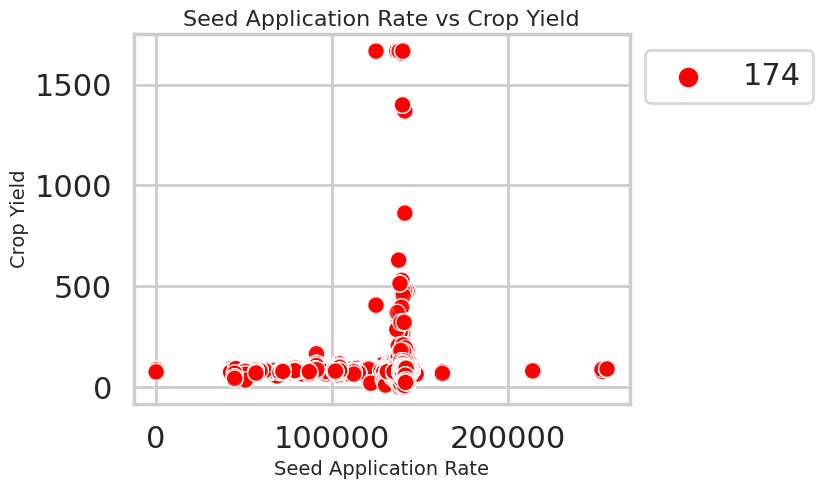

In [39]:
import pandas as pd
from dbfread import DBF
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import jenkspy

dbf = DBF('Export From MyJohnDeere - Harvest/doc/Merriweather Farms-JT-01-Soybeans.dbf')
dbf_seed = DBF('Export From MyJohnDeere - Seeding/doc/Merriweather Farms-JT-01-Soybeans.dbf')
df = pd.DataFrame(iter(dbf))
df_seed = pd.DataFrame(iter(dbf_seed))

#remove colunmns
df_crops = df[['VRYIELDVOL', 'Crop', 'WetMass', 'Moisture', 'Time', 'Elevation']]
df_crops = df_crops[df_crops['VRYIELDVOL'] != 0]
df_crops['AppliedRate'] = df_seed['AppliedRate']
breaks = jenkspy.jenks_breaks(df_crops['VRYIELDVOL'], n_classes=5)
print(breaks)
df_crops['YIELDLBL'] = pd.cut(df_crops['VRYIELDVOL'], breaks, include_lowest=True, labels=[1,2,3,4,5])


#x_train
# x_train = df_crops[]
#y_train

#x_test
#y_test

#x_val
#y_val


#herbie, get temperature wind, 384 hours (14 days), 
#x_plot1
#y_plot1


print(df_crops)
data = np.array(df_crops)
palette = ["red", "blue", "orange"]

sns.set_style('whitegrid')
sns.set_context('poster')
sns.scatterplot(data=df_crops, x = 'AppliedRate', y = 'VRYIELDVOL', hue = 'Crop', palette=palette, alpha=0.8)
plt.xlabel('Seed Application Rate', fontsize=14)
plt.ylabel('Crop Yield', fontsize=14)
plt.title('Seed Application Rate vs Crop Yield', fontsize=16)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()


In [27]:
import torch.nn as nn
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [36]:

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree


  # input_size = 
  # hidden_size = 
  # output_size = 

x = df_crops[['Moisture', 'Elevation', 'AppliedRate']]
y = df_crops["YIELDLBL"]

# plot_tree(clf, feature_names=x_train.columns, class_names=y_train.unique(), filled=True)

x_trainval, x_test, y_trainval, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 8)

x_train, x_val, y_train, y_val = train_test_split(x_trainval, y_trainval, test_size=0.25, random_state=8)

# print("Training set size:", len(x_train))
# print("Validation set size:", len(x_val))
# print("Test set size:", len(x_test))

clf = DecisionTreeClassifier(criterion='entropy', max_depth=16)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
# print(len(y_test)," : ", len(y_pred))

# error = np.sqrt(np.square(np.subtract(y_test, y_pred)).mean())
# print(error)
score = accuracy_score(y_test, y_pred)
print(score)


x_partitions = np.array_split(x_test, 3)
y_partitions = np.array_split(y_test, 3)
# print(len(x_partitions[0]))


x_plot1 = x_partitions[0][:100]
y_plot1 = y_partitions[0][:100]
x_plot2 = x_partitions[1][:100]
y_plot2 = y_partitions[1][:100]
x_plot3 = x_partitions[2][:100]
y_plot3 = y_partitions[2][:100]

# for i in range(10):
#     print("hi", x_plot3[i*10:i*10+10])
# for j in y_plot3:
#     print(j)

print(type(x_plot1))
# print(y_plot1)

farm1 = x_plot1
farm1['YIELDLBL'] = y_plot1

farm1 = pd.DataFrame(farm1)
# farm1 = farm1.reset_index()
# farm1 = farm1.drop("index", axis="columns")
farm1.to_json(r'farm1.json', orient='records')


# scores = cross_val_score(clf, np.array(x_val), np.array(y_val), cv=5)
# print('CV Accuracy: {}'.format(scores.mean()))






0.8742610837438424
<class 'pandas.core.frame.DataFrame'>


/tmp/ipykernel_227/798618092.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  farm1['YIELDLBL'] = y_plot1


In [33]:
farm2 = x_plot2
farm2['YIELDLBL'] = y_plot2

farm2 = pd.DataFrame(farm2)
# farm2 = farm2.reset_index()
# farm2 = farm2.drop("index", axis="columns")
farm2.to_json(r'farm2.json', orient='records')

/tmp/ipykernel_227/3682590365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  farm2['YIELDLBL'] = y_plot2


In [34]:
farm3 = x_plot3
farm3['YIELDLBL'] = y_plot3

farm3 = pd.DataFrame(farm3)
# farm3 = farm3.reset_index()
# farm3 = farm3.drop("index", axis="columns")
farm3.to_json(r'farm3.json', orient='records')

/tmp/ipykernel_227/905875034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  farm3['YIELDLBL'] = y_plot3
